In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

In [2]:
df=pd.read_csv('New_York_City_Leading_Causes_of_Death.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1516 non-null   int64 
 1   Leading Cause            1516 non-null   object
 2   Sex                      1516 non-null   object
 3   Race Ethnicity           1516 non-null   object
 4   Deaths                   1516 non-null   object
 5   Death Rate               1359 non-null   object
 6   Age Adjusted Death Rate  1359 non-null   object
dtypes: int64(1), object(6)
memory usage: 83.0+ KB


In [4]:
df.replace('.',np.nan, inplace= True)
df=df.dropna()
df = df.astype({'Year':'str','Deaths' : 'int64', 'Death Rate' : 'float64', 'Age Adjusted Death Rate' : 'float64'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 1513
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     973 non-null    object 
 1   Leading Cause            973 non-null    object 
 2   Sex                      973 non-null    object 
 3   Race Ethnicity           973 non-null    object 
 4   Deaths                   973 non-null    int64  
 5   Death Rate               973 non-null    float64
 6   Age Adjusted Death Rate  973 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 60.8+ KB



## Display top 7 rows of the dataframe in your notebook

In [6]:
df.head(7)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2015,Malignant Neoplasms (Cancer: C00-C97),Female,Asian and Pacific Islander,515,79.726669,78.865386
1,2015,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Asian and Pacific Islander,498,77.094915,81.605131
2,2015,Cerebrovascular Disease (Stroke: I60-I69),Female,Asian and Pacific Islander,95,14.706861,15.337931
3,2015,Influenza (Flu) and Pneumonia (J09-J18),Female,Asian and Pacific Islander,89,13.778007,14.706362
4,2015,Diabetes Mellitus (E10-E14),Female,Asian and Pacific Islander,71,10.991444,11.537397
5,2015,Alzheimer's Disease (G30),Female,Asian and Pacific Islander,50,7.740453,8.416913
6,2015,Chronic Lower Respiratory Diseases (J40-J47),Female,Asian and Pacific Islander,41,6.347172,6.670310



## Count number of null values (if any) for each column

In [7]:
df.isna().sum()

Year                       0
Leading Cause              0
Sex                        0
Race Ethnicity             0
Deaths                     0
Death Rate                 0
Age Adjusted Death Rate    0
dtype: int64


## Remove all but 2 numerical values columns of your choice and display the reducted dataframe

In [8]:
df2=df.copy()
df2.drop(['Death Rate','Age Adjusted Death Rate'], axis=1, inplace = True)
df2.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths
0,2015,Malignant Neoplasms (Cancer: C00-C97),Female,Asian and Pacific Islander,515
1,2015,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Asian and Pacific Islander,498
2,2015,Cerebrovascular Disease (Stroke: I60-I69),Female,Asian and Pacific Islander,95
3,2015,Influenza (Flu) and Pneumonia (J09-J18),Female,Asian and Pacific Islander,89
4,2015,Diabetes Mellitus (E10-E14),Female,Asian and Pacific Islander,71



## Display the average, median, and standard deviation of each of your numerical columns

In [9]:
df.describe()

,Deaths,Death Rate,Age Adjusted Death Rate
count,973.000000,973.000000,973.000000
mean,594.095581,53.632101,52.342639
std,954.404971,75.036033,66.958025
min,13.000000,2.400000,2.500000
25%,112.000000,12.100000,12.000000
50%,215.000000,18.860426,19.690289
75%,502.000000,70.100000,79.600000
max,7050.000000,491.400000,350.700000


## Plot two of the numerical columns one against the other in a scatter plot

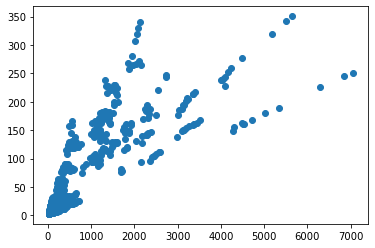

In [10]:
plt.scatter('Deaths','Age Adjusted Death Rate', data=df)

## Plot the data distribution of all your numerical columns in histogram and boxplot

In [11]:
num_dtypes=['int64','int32','int16','float64','float32','float16']
nums=df.select_dtypes(include=num_dtypes)
nums_col=nums.columns

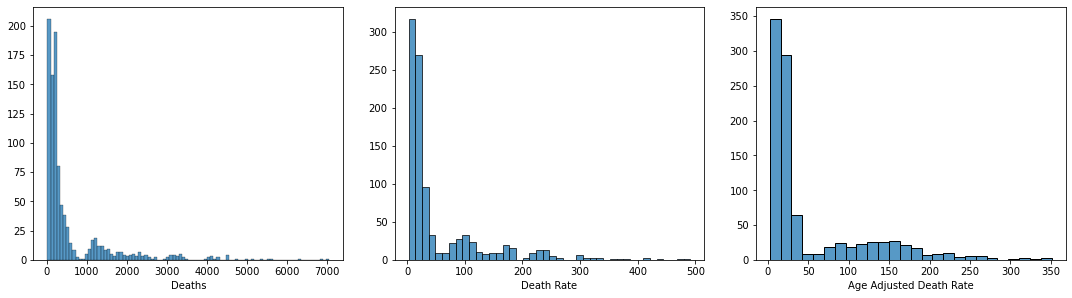

In [97]:
columns= ['Deaths','Death Rate','Age Adjusted Death Rate']

plt.figure(figsize=(15, 12))
for i in range(0, len(columns)):
    plt.subplot(len(columns), 3,i+1)
    sns.histplot(data=df, x=df[columns[i]])
    plt.tight_layout()
    plt.ylabel(None)

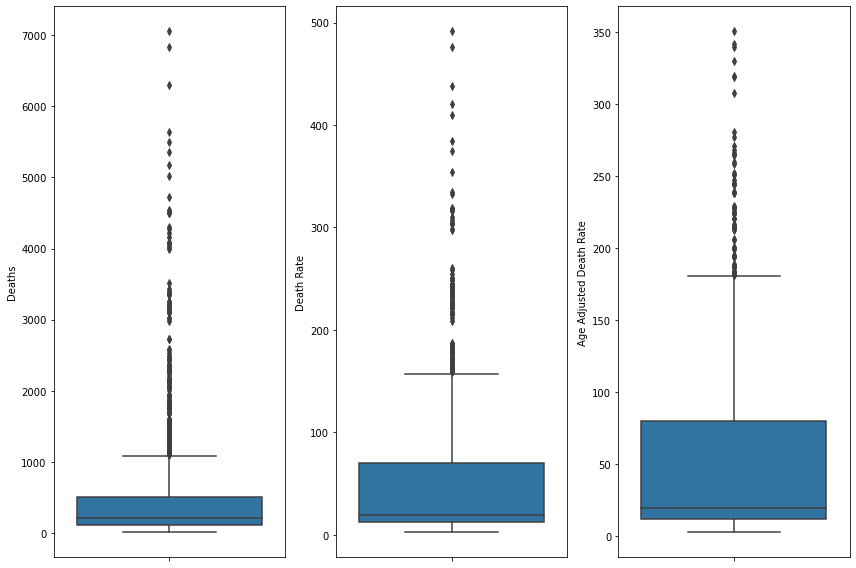

In [13]:
plt.figure(figsize= (12, 8))
for i in range(0, len(nums_col)): # for every value in nums
    plt.subplot(1, len(nums_col), i + 1) #row, columns, index
    sns.boxplot(y=df[nums_col[i]], orient ='v')
    plt.tight_layout()


## Create a new column in the same dataframe that is raised power of two of an existing column

In [14]:
df_new=df[['Leading Cause', 'Sex', 'Race Ethnicity']].sort_values('Leading Cause').reset_index(drop=True)
df_new.sample(10)

,Leading Cause,Sex,Race Ethnicity
151,All Other Causes,M,Hispanic
412,Diabetes Mellitus (E10-E14),M,White Non-Hispanic
249,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic
750,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander
731,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic
850,Malignant Neoplasms (Cancer: C00-C97),F,Asian and Pacific Islander
354,Chronic Lower Respiratory Diseases (J40-J47),Female,Non-Hispanic White
503,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic
513,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Non-Hispanic White
840,Malignant Neoplasms (Cancer: C00-C97),F,Asian and Pacific Islander


# Citibike

In [15]:
citibike=pd.read_csv('201709-citibike-tripdata.csv.zip')

In [16]:
import pandas as pd

In [17]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1


In [18]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878098 entries, 0 to 1878097
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 214.9+ MB


## Count the number of missing values of each column

In [19]:
citibike.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 207468
gender                          0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age

<AxesSubplot:xlabel='usertype', ylabel='count'>

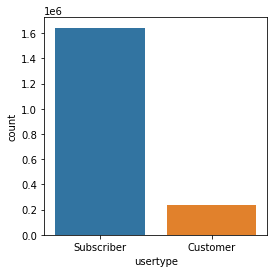

In [20]:
plt.figure(figsize=(4, 4))
sns.countplot(x=citibike['usertype'], data=citibike)

In [21]:
citibike['gender']=citibike['gender'].replace(0,'unknown')
citibike['gender']=citibike['gender'].replace(1,'male')
citibike['gender']=citibike['gender'].replace(2,'female')

<AxesSubplot:xlabel='gender', ylabel='count'>

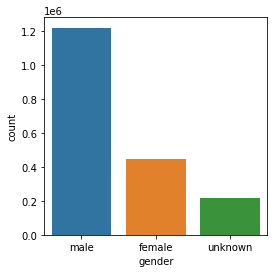

In [22]:
plt.figure(figsize=(4, 4))
sns.countplot(x=citibike['gender'], data=citibike)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


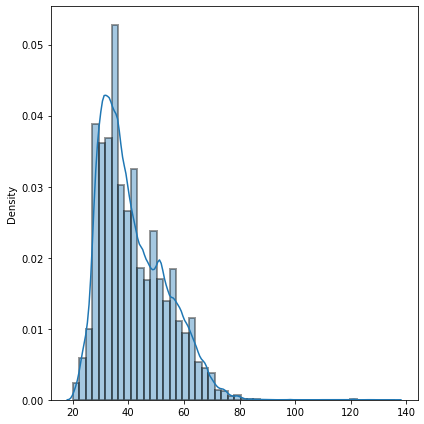

In [23]:
citibike['age']=2021-citibike['birth year']

plt.figure(figsize=(6, 6))
sns.distplot(x=citibike['age'],hist_kws=dict(edgecolor="k", linewidth=2))
plt.tight_layout()

## What is the average number of trips per day?

In [24]:
#menghitung jumlah hari

day=citibike['starttime'].str[0:10].nunique()
day

30

In [25]:
#menghitung jumlah trip

trip=citibike['tripduration'].count()
trip

1878098

In [26]:
#mencari rata-rata trip per hari

trip/day

62603.26666666667

## What is the average trip duration?

In [27]:
#menghitung jumlah trip
trip=citibike['tripduration'].count()
trip

1878098

In [28]:
duration=citibike['tripduration'].sum()
duration

1872630654

In [29]:
#mencari avg

duration/trip

997.0888920599458

## What days of the week are most rides taken on?

In [30]:
citibike['date']=citibike['starttime'].str[0:10].astype('datetime64[ns]')
citibike['day']=citibike['date'].dt.day_name()

In [31]:
rides=citibike.groupby(['day'])[['tripduration']].count().sort_values(by=['tripduration'],ascending=True).reset_index()
rides = rides.rename(columns={'tripduration': 'rides'})
rides[rides['rides'] == rides['rides'].max()]

,day,rides
6,Friday,334056


<AxesSubplot:xlabel='day', ylabel='rides'>

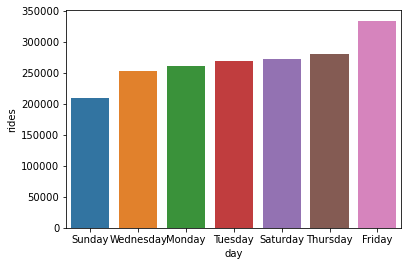

In [32]:
sns.barplot(x = 'day', y = 'rides' , data = rides)

hari jumat adalah hari paling banyak ridesnya

## What hour of the day are most rides taken on?

In [33]:
citibike['starttime']=citibike['starttime'].astype('datetime64[ns]')
citibike['hour']=citibike['starttime'].dt.hour

In [34]:
rides_hour=citibike.groupby(['hour'])[['tripduration']].count().sort_values(by=['tripduration'],ascending=False).reset_index()
rides_hour = rides_hour.rename(columns={'tripduration': 'rides'})

In [35]:
rides_hour[rides_hour['rides']==rides_hour['rides'].max()]

,hour,rides
0,17,185563


In [36]:
rides_hour.head()

,hour,rides
0,17,185563
1,18,183943
2,8,146721
3,16,133785
4,19,121029


<AxesSubplot:xlabel='hour', ylabel='rides'>

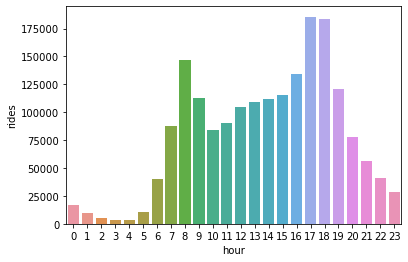

In [37]:
sns.barplot(x = 'hour', y = 'rides' , data = rides_hour)

## Is there correlation between age and trip duration?

In [38]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,date,day,hour
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,male,28.0,2017-09-01,Friday,0
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,male,33.0,2017-09-01,Friday,0
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,male,52.0,2017-09-01,Friday,0
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,male,28.0,2017-09-01,Friday,0
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,male,34.0,2017-09-01,Friday,0


In [39]:
citibike.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'age', 'date', 'day', 'hour'],
      dtype='object')

In [40]:
citibike = citibike.astype({'start station id' : 'object', 'end station id' : 'object', 'bikeid' : 'object'})

<AxesSubplot:>

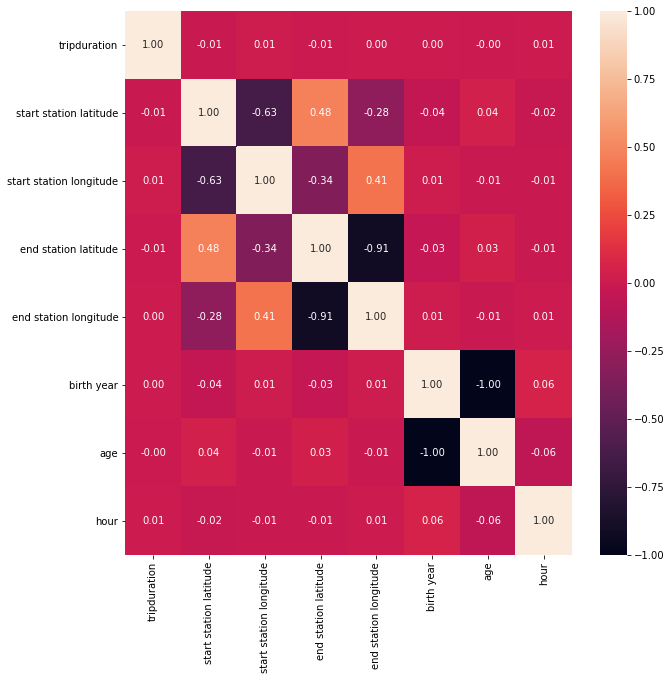

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(citibike.corr(), annot=True, fmt='.2f')

there is a little to none correlation between age and trip duration, because the correlation value is -0,00

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [42]:
stations=citibike.groupby(['start station name', 'end station name'])[['tripduration']].count().reset_index().sort_values(by=['tripduration'],ascending=False)

In [43]:
stations.head(10)

,start station name,end station name,tripduration
38402,Central Park S & 6 Ave,Central Park S & 6 Ave,856
4818,12 Ave & W 40 St,West St & Chambers St,781
75000,E 7 St & Avenue A,Cooper Square & E 7 St,770
38354,Central Park S & 6 Ave,5 Ave & E 88 St,701
88775,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,578
161956,West St & Chambers St,12 Ave & W 40 St,562
127788,Soissons Landing,Soissons Landing,560
118800,Picnic Point,Soissons Landing,558
119159,Pier 40 - Hudson River Park,West St & Chambers St,549
4696,12 Ave & W 40 St,Pier 40 - Hudson River Park,538


## Come up with your own question on the Citibike data usage and formulate a hypothesis

most of the bike trips user for every trip have an age below 50

null hypothesis: The proportion of bike user below the age 50 is higher than over the age of 50.

## Work with your dataset and show your findings to help answer your question

In [91]:
usia=citibike['age']
age_cat=[]

for i in usia:
    if i < 50:
        age_cat.append('below_50')
    elif i >= 50:
        age_cat.append('above_50')
    else:
        age_cat.append('no_info')

In [92]:
age_kat=pd.DataFrame(age_cat)

<AxesSubplot:xlabel='0', ylabel='count'>

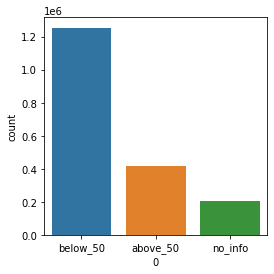

In [95]:
plt.figure(figsize=(4, 4))
sns.countplot(x=age_kat[0], data=age_kat)

based on the chart, it is true that most of the bike user is below the age of 50.

with the assumption that evey trip is a different user